In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pdb
import astropy
from astropy.table import Table
import linecache
from astropy.io import ascii
from scipy.signal import savgol_filter
import copy
import random
from astropy import units as u
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting.continuum import fit_continuum
from specutils.fitting import fit_lines
from spectres import spectres

This notebook smoothes the sensitivity function for the fluxing step of the reduction process.
In the reduction process:
- Fluxing is done to convert the SN spectrum from telescope counts into flux density units

# Smoothing Sensitive Function for Fluxing

In [14]:
hdul=fits.open('/home/lara/ICE/Reduction/GTCMULTIPLE2B_23A/OB0002/gtc_osiris_plus_B/Science/sensfunc_B.fits')
print(hdul)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7ff65c6d0490>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7ff6ae7280a0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7ff668182f40>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7ff6ae71f550>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7ff6681936d0>]


In [15]:
lam=hdul[1].data['SENS_WAVE'][0]
sens=hdul[1].data['SENS_ZEROPOINT_FIT'][0]

hdul.info()

lam2=hdul[2].data.T[0]
sens2=hdul[3].data.T[0]

original=copy.deepcopy(sens2)
print(sens2)
print(original)

Filename: /home/lara/ICE/Reduction/GTCMULTIPLE2B_23A/OB0002/gtc_osiris_plus_B/Science/sensfunc_B.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  SENS          1 BinTableHDU     59   1R x 11C   ['2024D', '2024D', '2024D', '2024L', '2024D', '2024L', 'D', 'K', 'K', 'D', 'D']   
  2  WAVE          1 ImageHDU        19   (1, 3859)   float64   
  3  ZEROPOINT     1 ImageHDU        19   (1, 3859)   float64   
  4  THROUGHPUT    1 ImageHDU        19   (1, 3859)   float64   
[19.76712578 19.76893494 19.7707441  ... 16.00339477 16.00012641
 15.99685805]
[19.76712578 19.76893494 19.7707441  ... 16.00339477 16.00012641
 15.99685805]


In [16]:
lam2.T[0]

4591.746534678498

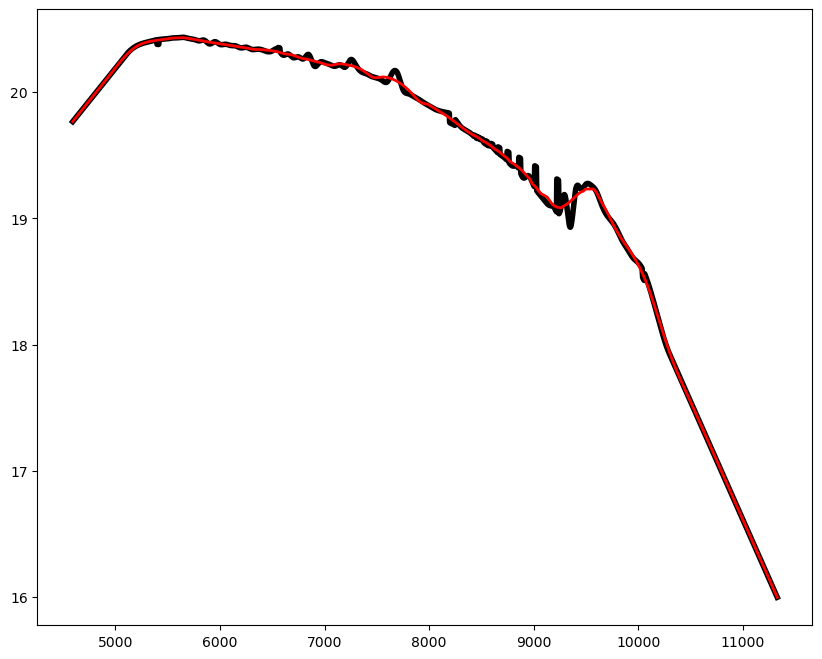

In [18]:
fig,ax=plt.subplots(1,1,figsize=(10,8))

wl=7000
wh=7400
a=sens[(lam>wl)&(lam<wh)]
random_float_list = []
for i in range(0, len(sens[(lam>wl)&(lam<wh)])):
    x = round(random.uniform(a[0], a[-1]), 8)
    random_float_list.append(x)
#Create a sorted list with values between e.g, 19.92363479 (lam=7000A) and 19.84651758 (lam=7400A)
#pdb.set_trace()
#sens[(lam>wl)&(lam<wh)]=sorted(random_float_list,reverse=True)


sy2 = savgol_filter(sens2,291, 3)
plt.plot(lam2,original,lw=4,color='k')
plt.plot(lam2,sy2,lw=2,color='red')
#plt.plot(lam2,tr2,alpha=0.7,color='red',lw=2)
#plt.xlim(7500,8000)

plt.savefig('/home/lara/ICE/Reduction/GTCMULTIPLE2B_23A/OB0002/gtc_osiris_plus_B/Science/smooth_sensfunc.jpg', format='jpg', dpi=300, bbox_inches = "tight")

In [19]:
sy2=sy2.reshape(-1,1)

In [20]:
#Create a new file by copying original sensitivity file
new_hdul=copy.deepcopy(hdul)

In [21]:
#Replacing the original values with the smoothed ones
#new_hdul[1].data['SENS_ZEROPOINT_FIT'][0]=sy
new_hdul[3].data=sy2

In [22]:
print(new_hdul[3].data)#['SENS_ZEROPOINT_FIT'][0])

[[19.76712578]
 [19.76893494]
 [19.7707441 ]
 ...
 [16.00339477]
 [16.00012641]
 [15.99685805]]


In [23]:
print(hdul[3].data)#['SENS_ZEROPOINT_FIT'][0])

[[19.76712578]
 [19.76893494]
 [19.7707441 ]
 ...
 [16.00339477]
 [16.00012641]
 [15.99685805]]


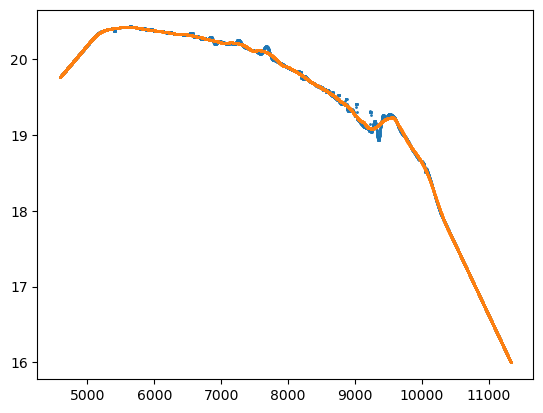

In [24]:
lam=hdul[1].data['SENS_WAVE'][0]
sens=hdul[1].data['SENS_ZEROPOINT_FIT'][0]
nsens=new_hdul[1].data['SENS_ZEROPOINT_FIT'][0]

#plt.scatter(lam,sens,s=1)
#plt.scatter(lam,nsens,s=1)
#plt.show()

sens3=new_hdul[3].data.T[0]

plt.scatter(lam2,original,s=1)
plt.scatter(lam2,sens3,s=1)
plt.show()

In [25]:
#Write new file to use for fluxing
new_hdul.writeto('/home/lara/ICE/Reduction/GTCMULTIPLE2B_23A/OB0002/gtc_osiris_plus_B/Science/sensfunc_B_smoothed.fits', overwrite=True)

In [41]:
hdul=fits.open('/home/lara/ICE/Reduction/GTC52_20A/OB0001/gtc_osiris_B/Science/sensfunc_B_smoothed.fits')
f=hdul[1].data['SENS_ZEROPOINT_FIT'][0]
l=hdul[1].data['SENS_WAVE'][0]

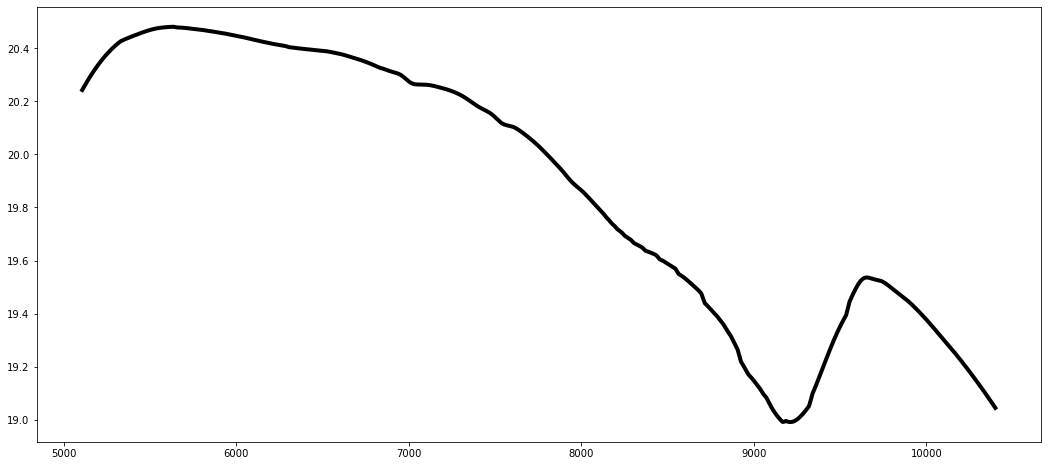

In [42]:
fig,ax=plt.subplots(1,1,figsize=(18,8))

#ax.plot(lam,sens)

plt.plot(l,f,lw=4,color='k')